In [2]:
import os 
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import itertools
import seaborn as sns
import pandas as pd
resultExact = "C:/Users/davie/Desktop/results/leaveout"
resultGenus = "C:/Users/davie/Desktop/results/leaveoutgenus"
resultFamily = "C:/Users/davie/Desktop/results/leaveoutfamily"
files = os.listdir(resultExact)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
files[0]

'BaseCSV#plantPollinatorUSA'

In [80]:
def getResultsForCategory(basepath):
    doneNotDone = []
    ecoTransTime = []
    buildTime = []
    results = []
    actuals = []
    files = os.listdir(basepath)
    for item in files:
        with open(basepath+"/"+item,'rb') as f:
            arr = pickle.load(f)
            result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
            doneNotDone.append([done,notDone])
            namesLen = len(set(itertools.chain(*actual)))
            ecoTransTime.append([namesLen,translatedTime,item])
            results.append(result)
            actuals.append(actual)
            buildTime.append([namesLen,finalTime-translatedTime])
    return buildTime,doneNotDone,ecoTransTime,results,actuals

In [66]:
sum((1,3,4))

8

FoodsWebsCanberra#WEB328


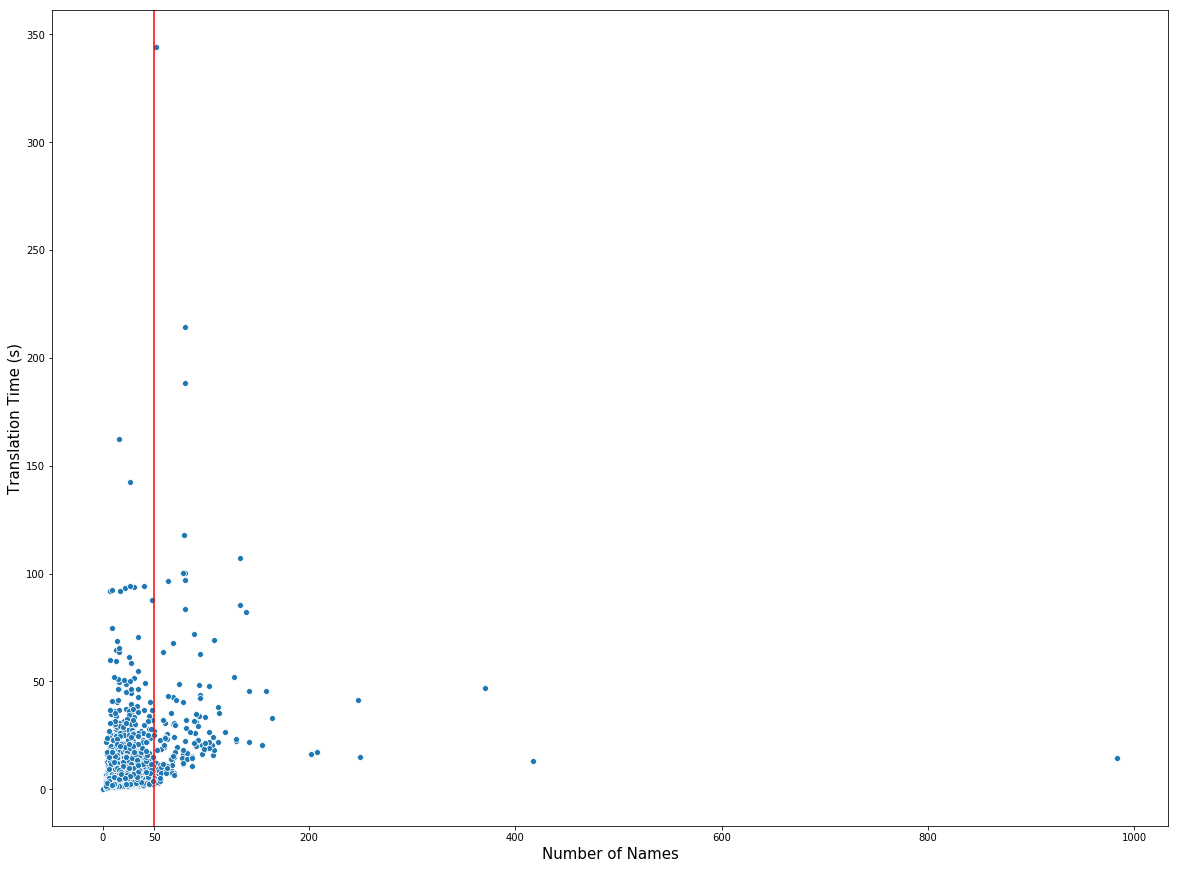

In [98]:
from collections import defaultdict
ecoTransTimeExact = getResultsForCategory(resultExact)[2]
ecoTransTimeGenus = getResultsForCategory(resultGenus)[2]
ecoTransTimeFamily = [x for x in ecoTransTimeExact] #getResultsForCategory(resultFamily)[2]

aggregated = defaultdict(list)
nameLenStore = {}
for nameLen, time, idx in ecoTransTimeExact:
    if time > 300: print(idx)
    aggregated[idx].append(time)
    nameLenStore[idx] = nameLen

for nameLen, time, idx in ecoTransTimeGenus:
    aggregated[idx].append(time)
    nameLenStore[idx] = nameLen

for nameLen, time, idx in ecoTransTimeFamily:
    aggregated[idx].append(time)
    nameLenStore[idx] = nameLen

ecoTransTime = list(map(lambda x: [nameLenStore[x],sum(aggregated[x])/len(aggregated[x])],list(aggregated.keys())))
dataSet = pd.DataFrame(ecoTransTime,columns=['Number of Names','Translation Time'])
ax = sns.scatterplot(x="Number of Names", y="Translation Time",data=dataSet)
labels = [w.get_text() for w in ax.get_xticklabels()]
locs=list(ax.get_xticks())
labels=['0','50','200','400','600','800','1000']
locs=[0,50,200,400,600,800,1000]
ax.set_xticklabels(labels)
ax.set_xticks(locs)
plt.xlabel("Number of Names",fontsize=15)
plt.ylabel("Translation Time (s)",fontsize=15)
plt.axvline(x=50,c='r')
plt.show()

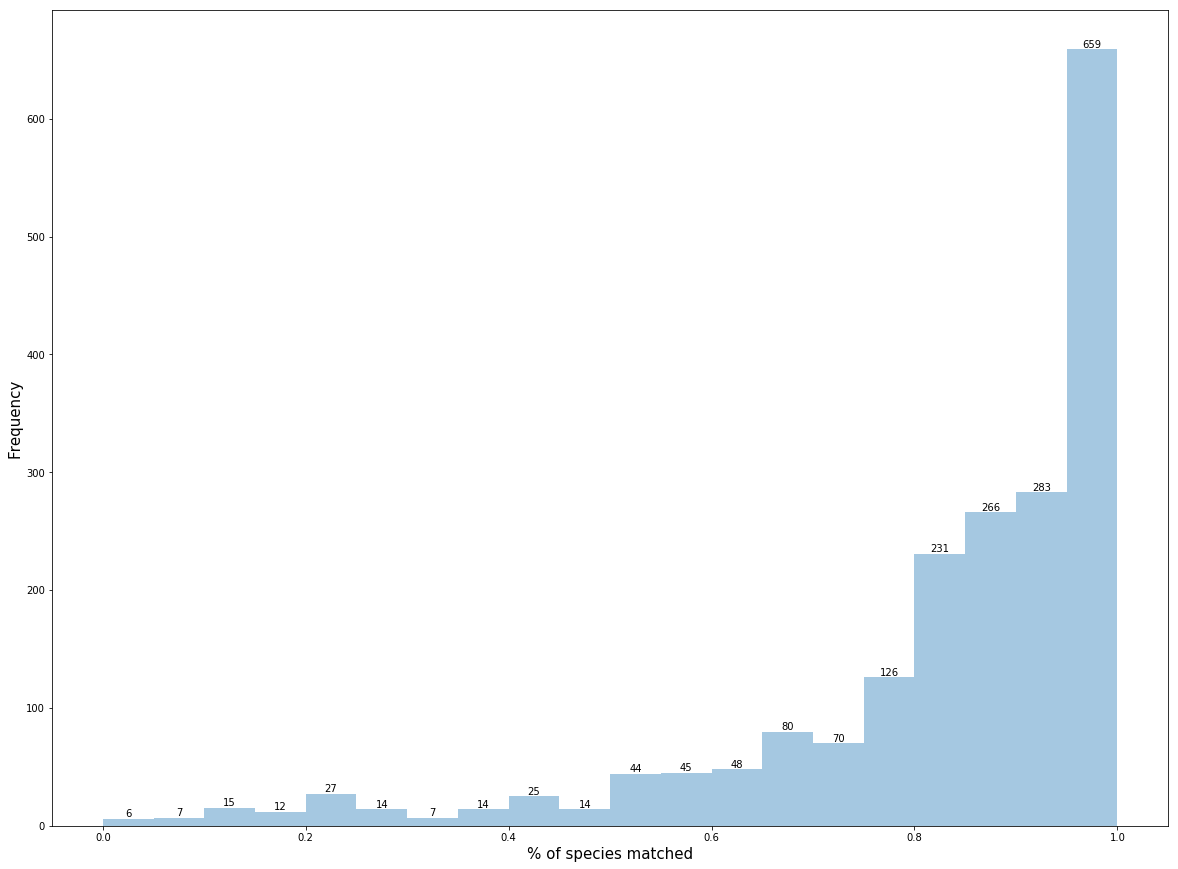

In [85]:
def numCorrectlyIndexed(doneAndNotDoneTuples):
    x = list(map(lambda x: x[0]/sum(x) if sum(x) > 0 else 0,doneAndNotDoneTuples))
    g = sns.distplot(x, hist=True,kde=False,bins=20)
    plt.ylabel('Frequency', fontsize = 15) # x-axis label with fontsize 15
    plt.xlabel('% of species matched', fontsize = 15) # y-axis label with fontsize 15
    for p in g.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        g.annotate(str(int(y)), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text

results = getResultsForCategory(resultExact)[1]
results = list(map(lambda x: [x[0],len(x[1])],results))
numCorrectlyIndexed(results)

In [41]:
import itertools
results = getResultsForCategory(resultExact)[1]
results = set(itertools.chain(*map(lambda x: x[1],results)))
results

{'',
 'reduviids',
 'young fish',
 'Oligochaete Type II',
 'Killer Whales C',
 "Lumbriculiid oligochaete unknown 'long' (CG)",
 'P. ternetzi',
 'belvedere summer cypress (forb/shrub)',
 'Chionobis macouni',
 'Unreared hispine sp.6',
 'submerged macrophytes (Blyxa - Cryptocoryne - Nitella)',
 'mangrove leaves',
 'hymenolepidid cestodes',
 'CYCLOPOID COPEPODS (Mesocyclops sp.)',
 'filter feeders',
 'trout, jack',
 'terrestrial flies',
 'Encyrtid (near Tachinaephagus)',
 'C: cephalopod aggregate',
 '13-striped spermophile (ground squirrel)',
 'Carnivorous zooplankton',
 'Stigeid',
 'Tendipedidae (unspecified)',
 'cecidomyid larvae (undet.)',
 'Terrestrial bugs',
 'Nauplii sp.',
 'Nematode',
 'predaceous crabs',
 'Asteroidea',
 'carnivorous arthropods',
 'Cyanobacteria',
 'pike - large perch',
 'Flatfish spp.',
 'elasmobranch fishes',
 'Hirud - Tricladida - Hydrachn',
 'fine particulate organic matter',
 'Hudsonema amabilis (n=10)',
 'canker - fomes',
 'nearshore phytoplankton',
 'Dytiscid

In [43]:
for item in results:
    if 'seal' in item:
        print(item)

leopard seals
seals
whales - crabeater seals
whales, crabeater seals
bearded seals
Leopard seals
harbor seals
Crabeater seals
ringed seals
harbour seal
Weddel seals
Weddell seals
crabeater seals


In [37]:
(659+283+266+231) 

1439

In [36]:
(659) / 1993

0.33065730055193177

In [ ]:
def prepBuildTime(buildTime):
    buildTime = list(filter(lambda x: x[0] > 0,buildTime))
    buildTime = list(map(lambda x: x[1] / x[0] if x[0] > 0 else 0 ,buildTime))
    return buildTime

crush = []
exact = list(map(lambda x: ["Exact",x], prepBuildTime(getResultsForCategory(resultExact)[0])))
# genus = list(map(lambda x: ["Genus",x], prepBuildTime(getResultsForCategory(resultGenus)[0])))
# family = list(map(lambda x: ["Family",x], prepBuildTime(getResultsForCategory(resultFamily)[0])))
genus = []
family = []
crush = [*exact,*genus,*family]
dataSet = pd.DataFrame(crush,columns=['Generalisation','Time'])
ax = sns.boxplot(x="Generalisation", y="Time", data=dataSet)

In [ ]:
sum()

In [ ]:
def calculateSpeciesPerRecord(results):
    generated,real = results
    generated = list(map(lambda x: x[1],generated))
    generated = list(set(itertools.chain(*generated)))
    real = list(set(itertools.chain(*real)))
    if len(real) == 0: return 0 
    return len(generated) / len(real)   

def calculateSpeciesIncluded(results):
    matched = list(zip(results[0],results[1]))
    matched = list(map(calculateSpeciesPerRecord,matched))
    print(list(filter(lambda x: x < 0,matched)))
    return matched

crush = []
# calculateSpeciesIncluded(getResultsForCategory(resultExact)[3:5])
exact = list(map(lambda x: ["Exact",x], calculateSpeciesIncluded(getResultsForCategory(resultExact)[3:5])))
# genus = list(map(lambda x: ["Genus",x], prepBuildTime(getResultsForCategory(resultGenus)[0])))
# family = list(map(lambda x: ["Family",x], prepBuildTime(getResultsForCategory(resultFamily)[0])))
genus = []
family = []
crush = [*exact,*genus,*family]
dataSet = pd.DataFrame(crush,columns=['Generalisation','Time'])

fig = plt.figure()
ax = sns.violinplot(x="Generalisation", y="Time", data=dataSet,cut=0)


# This should be called after all axes have been added
fig.tight_layout()